# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

In [ ]:
import matplotlib.pyplot as plt
import torch 
import numpy as np
from sympy import symbols, sin, ln, diff, cos

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
from sympy import *

x, y, z = symbols('x y z')
f = x**2

diff(f, x)

2*x

In [6]:
x = torch.randn(10, requires_grad=True)
f = x**2
print(x) # created by the user -> grad_fn is None
print(f)
print(f.grad_fn)

tensor([-1.0375, -1.1379, -0.3001,  0.3129,  1.3074,  1.7563,  1.8625,  0.8543,
         0.5164, -0.7319], requires_grad=True)
tensor([1.0764, 1.2949, 0.0900, 0.0979, 1.7092, 3.0846, 3.4690, 0.7298, 0.2666,
        0.5357], grad_fn=<PowBackward0>)


In [8]:
f = f.mean()

f.backward()
print(x.grad)

tensor([-0.2075, -0.2276, -0.0600,  0.0626,  0.2615,  0.3513,  0.3725,  0.1709,
         0.1033, -0.1464])


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [1, 10]. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [16]:
x, y, z = symbols('x y z')
f1 = sin(x)/(ln(x)+1)
f_diff = diff(f1, x)
f_diff

cos(x)/(log(x) + 1) - sin(x)/(x*(log(x) + 1)**2)

In [20]:
f_diff_func = lambda x: f_diff
f_diff_func

<function __main__.<lambda>(x)>

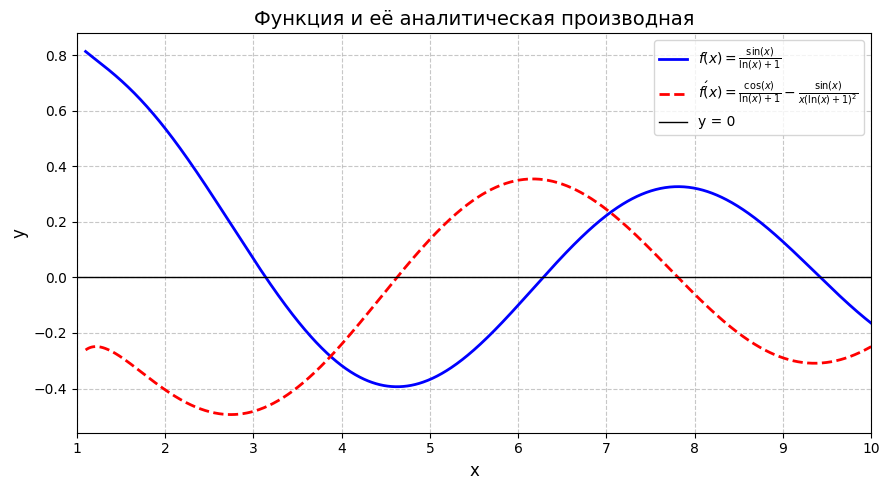

In [41]:
f_func = lambda x: torch.sin(x) / (torch.log(x) + 1)
f_diff_func = lambda x: (torch.cos(x)*(torch.log(x)+1) - torch.sin(x)/x) / (torch.log(x)+1)**2

x_vals = torch.linspace(1.1, 10, 1000)
y_f = f_func(x_vals)
y_f_prime = f_diff_func(x_vals)


plt.figure(figsize=(9, 5))


plt.plot(x_vals.numpy(), y_f, 'b-', linewidth=2, 
         label=r'$f(x) = \frac{\sin(x)}{\ln(x) + 1}$')
plt.plot(x_vals.numpy(), y_f_prime, 'r--', linewidth=2, 
         label=r'$f\'(x) = \frac{\cos(x)}{\ln(x) + 1} - \frac{\sin(x)}{x(\ln(x) + 1)^2}$')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, label='y = 0')


plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1, 10)

plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [1, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [45]:
def numerical_derivative(f, x, h=1e-5):
    return (f_func(x + h) - f_func(x - h)) / (2 * h) # методом центральных разностей

y_f_prime_numerical = numerical_derivative(f, x_vals)

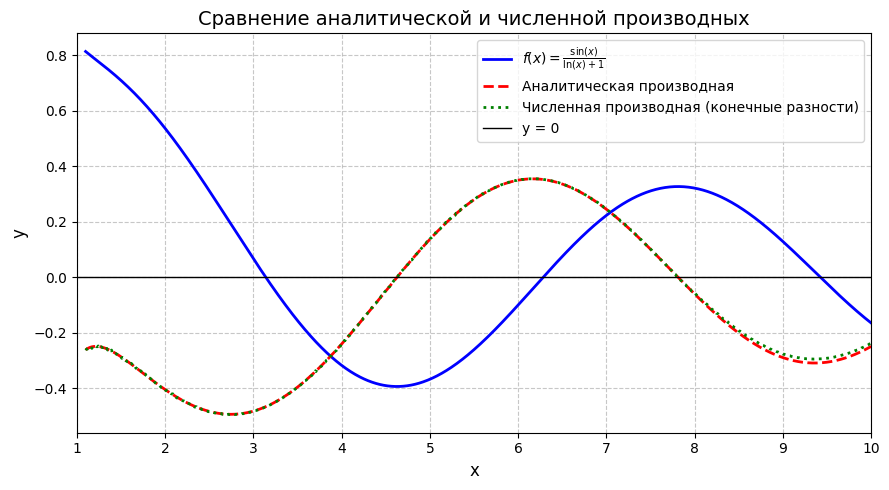

Максимальная ошибка численного метода: 0.014550
Средняя ошибка численного метода: 0.003244


In [53]:
plt.figure(figsize=(9, 5))


plt.plot(x_vals, y_f, 'b-', linewidth=2, 
         label=r'$f(x) = \frac{\sin(x)}{\ln(x) + 1}$')
plt.plot(x_vals, y_f_prime, 'r--', linewidth=2, 
         label='Аналитическая производная')
plt.plot(x_vals, y_f_prime_numerical, 'g:', linewidth=2, 
         label='Численная производная (конечные разности)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, label='y = 0')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1, 10)

plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

error = torch.abs(y_f_prime - y_f_prime_numerical)
max_error = torch.max(error)
mean_error = torch.mean(error)

print(f"Максимальная ошибка численного метода: {max_error:.6f}")
print(f"Средняя ошибка численного метода: {mean_error:.6f}")

<p class="task" id="3"></p>

3\. Найдите локальный минимум функции $f(x)$ при помощи метода градиентного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [59]:
def gradient_descent(f, x0, learning_rate=0.1, n_iter=100, maximize=False):
    history = []

    x = torch.tensor([x0], requires_grad=True, dtype=torch.float32)
    
    sign = 1 if maximize else -1
    
    for i in range(n_iter):
        y = f(x)
    
        y.backward()
        history.append({
            'x': x.item(),
            'y': y.item(),
            'grad': x.grad.item() if x.grad is not None else 0
        })
     
        with torch.no_grad():
            x += sign * learning_rate * x.grad
            
        x.grad.zero_()
        

        x.requires_grad = True
    
    return x.item(), history

x_min, hist_min = gradient_descent(f_func, x0=4.0, learning_rate=0.1, n_iter=100, maximize=False)


x_max, hist_max = gradient_descent(f_func, x0=9.0, learning_rate=0.1, n_iter=100, maximize=True)

print(f"Локальный минимум: x = {x_min:.6f}, f(x) = {f_func(torch.tensor(x_min)):.6f}")
print(f"Локальный максимум: x = {x_max:.6f}, f(x) = {f_func(torch.tensor(x_max)):.6f}")

print("\nПоиск минимума:")
for i, h in enumerate(hist_min[:5]):
    print(f"Iter {i}: x={h['x']:.6f}, f(x)={h['y']:.6f}, grad={h['grad']:.6f}")

print("\nПоиск максимума:")
for i, h in enumerate(hist_max[:5]):
    print(f"Iter {i}: x={h['x']:.6f}, f(x)={h['y']:.6f}, grad={h['grad']:.6f}")

Локальный минимум: x = 4.615289, f(x) = -0.393492
Локальный максимум: x = 7.864398, f(x) = 0.326529

Поиск минимума:
Iter 0: x=4.000000, f(x)=-0.317145, grad=-0.240690
Iter 1: x=4.024069, f(x)=-0.322834, grad=-0.232001
Iter 2: x=4.047269, f(x)=-0.328119, grad=-0.223550
Iter 3: x=4.069624, f(x)=-0.333025, grad=-0.215339
Iter 4: x=4.091158, f(x)=-0.337576, grad=-0.207372

Поиск максимума:
Iter 0: x=9.000000, f(x)=0.128899, grad=-0.289455
Iter 1: x=8.971054, f(x)=0.137231, grad=-0.286198
Iter 2: x=8.942434, f(x)=0.145373, grad=-0.282739
Iter 3: x=8.914161, f(x)=0.153316, grad=-0.279091
Iter 4: x=8.886251, f(x)=0.161052, grad=-0.275267


<p class="task" id="4"></p>

4\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку. 

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [62]:
def automatic_derivative_vectorized(f, x_values):

    x_tensor = x_values.clone().detach().requires_grad_(True)
    
    y = f(x_tensor)
    
    gradients = torch.autograd.grad(
        outputs=y,
        inputs=x_tensor,
        grad_outputs=torch.ones_like(y),
        create_graph=False,
        retain_graph=True
    )[0]
    
    return gradients


y_f_prime_auto = automatic_derivative_vectorized(f_func, x_vals)

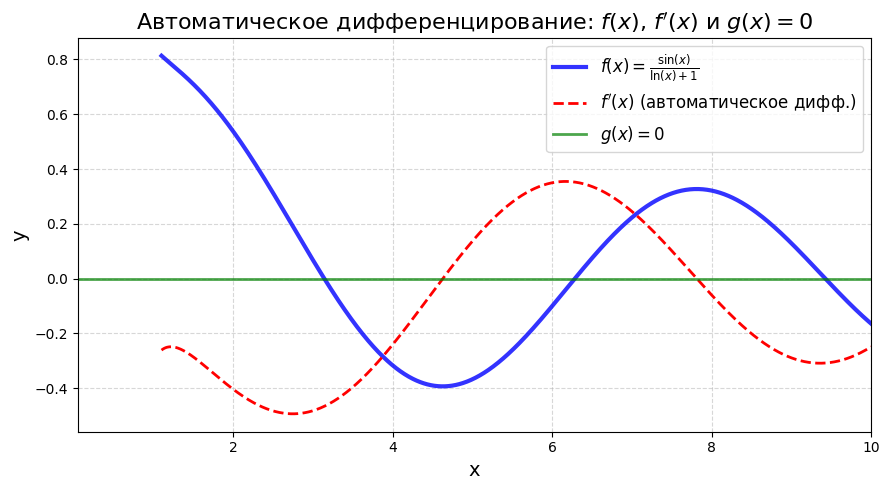

In [64]:
plt.figure(figsize=(9, 5))

plt.plot(x_vals, y_f, 'b-', linewidth=3, 
         label=r'$f(x) = \frac{\sin(x)}{\ln(x) + 1}$', alpha=0.8)
plt.plot(x_vals, y_f_prime_auto, 'r--', linewidth=2, 
         label=r"$f'(x)$ (автоматическое дифф.)")


plt.axhline(y=0, color='green', linestyle='-', linewidth=2, 
            label='$g(x) = 0$', alpha=0.7)


plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Автоматическое дифференцирование: $f(x)$, $f\'(x)$ и $g(x) = 0$', fontsize=16)
plt.legend(loc='upper right', fontsize=12)


plt.grid(True, which='minor', alpha=0.2)

plt.xlim(0.05, 10)

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

- [ ] Проверено на семинаре

In [69]:
def f(x: torch.Tensor) -> torch.Tensor:
    """Исходная сложная функция"""
    return torch.sin(torch.cos(x))

# Определяем компоненты для формулы производной сложной функции
def g(x: torch.Tensor) -> torch.Tensor:
    """Внутренняя функция: g(x) = cos(x)"""
    return torch.cos(x)

def h(g_val: torch.Tensor) -> torch.Tensor:
    """Внешняя функция: h(g) = sin(g)"""
    return torch.sin(g_val)

def dfdg(g_val: torch.Tensor) -> torch.Tensor:
    """Производная внешней функции по g: dh/dg = cos(g)"""
    return torch.cos(g_val)

def dgdx(x: torch.Tensor) -> torch.Tensor:
    """Производная внутренней функции по x: dg/dx = -sin(x)"""
    return -torch.sin(x)

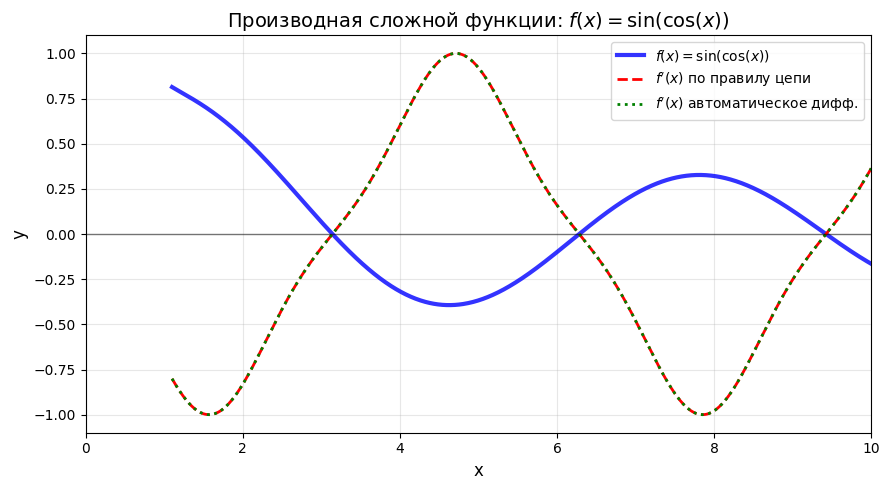

Максимальная ошибка производного метода: 0.000000
Средняя ошибка производного метода: 0.000000


In [77]:

def dfdx(x: torch.Tensor) -> torch.Tensor:
    g_val = g(x)
    return dfdg(g_val) * dgdx(x)



y_f_prime_chain = dfdx(x_vals)  
y_f_prime_auto = automatic_derivative_vectorized(f, x_vals) 


plt.figure(figsize=(9, 5))


plt.plot(x_vals, y_f, 'b-', linewidth=3, 
         label=r'$f(x) = \sin(\cos(x))$', alpha=0.8)
plt.plot(x_vals, y_f_prime_chain, 'r--', linewidth=2, 
         label=r"$f'(x)$ по правилу цепи")
plt.plot(x_vals, y_f_prime_auto, 'g:', linewidth=2, 
         label=r"$f'(x)$ автоматическое дифф.")

plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)


plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

error = torch.abs(y_f_prime_chain - y_f_prime_auto)
max_error = torch.max(error)
mean_error = torch.mean(error)

print(f"Максимальная ошибка производного метода: {max_error:.6f}")
print(f"Средняя ошибка производного метода: {mean_error:.6f}")